<a href="https://colab.research.google.com/github/Aamna-Khan-Git/Models/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    Yes Bank Stock Closing Price Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
Name: Aamna Khan

# **Project Summary -**

This project focuses on predicting the monthly closing stock price of Yes Bank using historical data and machine learning techniques. The dataset spans from 2005 to 2020 and includes key financial features like open, high, low, and close prices. Through data preprocessing and exploratory data analysis, important trends were identified, such as the sharp rise in prices until 2017 followed by a significant drop post-2018 due to the bank's fraud scandal. Visualizations revealed strong positive correlations between closing price and other price features, supporting the use of supervised regression models like Linear Regression and Random Forest. The model helps forecast future stock prices, providing valuable insights for investors, while also highlighting the impact of financial mismanagement on stock performance.


# **GitHub Link -**

[GitHub repository](*https*://github.com/Aamna-Khan-Git/Models.git)

# **Problem Statement**


Yes Bank, a prominent player in the Indian financial sector, experienced significant stock price volatility following a high-profile fraud case involving Rana Kapoor in 2018. This incident raised concerns about how such events influence market performance and whether predictive models can effectively anticipate such shifts. The objective of this project is to develop a supervised machine learning model capable of accurately predicting the monthly closing stock price of Yes Bank using historical data. The dataset includes monthly information on opening, closing, highest, and lowest prices. The solution aims to provide insights into market behavior and support financial decision-making using regression and time series techniques.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [ ]:
# Dataset First Look
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labmentix/data_YesBank_StockPrices.csv')
df1.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df1.shape

### Dataset Information

In [ ]:
# Dataset Info
df1.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df1.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(df1.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains 185 rows and 5 columns, namely, date, open, high, low and close price. The date column is object data type, while the rest of the columns are of float64 data type. There are no duplicates or null values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

In [ ]:
# Dataset Describe
df1.describe()

### Variables Description

The dataset contains four important features about Yes Bank's monthly stock prices: Open, High, Low, and Close. The Open price is the stock's value at the start of the month, which varies a lot—from as low as ₹10 to as high as ₹369.95, with an average around ₹105. The High price is the highest value the stock reached in a month, going up to ₹404, again showing big ups and downs. The Low price is the lowest value in the month, with a range from ₹5.55 to ₹345.50. The Close price is the stock's value at the end of the month and is the one we aim to predict. It ranges from ₹9.98 to ₹367.90, with an average of ₹105. However, since the middle value (median) is much lower at ₹62.54, it means that there were some very high prices that pulled the average up. Overall, the stock prices show a lot of variation, which makes this a good case for prediction using machine learning.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df1.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
import pandas as pd
from datetime import datetime

# Assuming df1 is already loaded
# df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labmentix/data_YesBank_StockPrices.csv')

# Create a mapping for month abbreviations to numbers
month_map = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

# First, ensure the 'Date' column is treated as strings
df1['Date'] = df1['Date'].astype(str)

# Split the 'Date' column by the hyphen to separate month abbreviation and year/rest
df1['Date_parts'] = df1['Date'].str.split('-')

# Extract month abbreviation and year
df1['Month_abbr'] = df1['Date_parts'].str[0]
df1['Year_str'] = df1['Date_parts'].str[1] # Keep year as string for now

# Map month abbreviations to numbers
df1['Month_num_str'] = df1['Month_abbr'].apply(lambda x: month_map.get(x, '00'))

# --- FIX START ---
# Ensure the year is always a 4-digit string
# We can assume years before 2000 are 19XX, and years after are 20XX
# A more robust approach would require knowing the exact range of years
# For simplicity, let's assume any 2-digit year refers to the 2000s
df1['Year_4_digit_str'] = df1['Year_str'].apply(lambda y: '20' + y if len(y) == 2 else y)
# --- FIX END ---

# Create an integer representation like YYYYMM
# Concatenate the 4-digit year string and the 2-digit month number string
df1['Date_integer'] = (df1['Year_4_digit_str'] + df1['Month_num_str']).astype(int)

# Drop the intermediate columns and the original 'Date' column
df1 = df1.drop(columns=['Date', 'Date_parts', 'Month_abbr', 'Year_str', 'Month_num_str', 'Year_4_digit_str'])

# Display the first and last few rows to see the result
print(df1.head(20))
print (df1.tail(20))

# Check the data type of the new column
print("\nData type of 'Date_integer' column:")
print(df1['Date_integer'].dtype)

# Now, for the splitting code, we can simplify it since Date_integer is always YYYYMM

### What all manipulations have you done and insights you found?

The Date column was converted from object to integer datatype, called Date_integer in order to make it ready for training the machine learning model, and the Date column was dropped. The Date_integer column follows YYYMM format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 3 visualization code
# Chart - 1 visualization code
# bar graph showing relationship between close price and date connected by lines

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Date_integer' column is sorted for a meaningful line plot
df_sorted = df1.sort_values(by='Date_integer')

# Create a figure and a set of subplots
plt.figure(figsize=(14, 7))

# Plotting the close price against the Date_integer
# Use 'Date_integer' as the x-axis and 'Close' as the y-axis
# A line plot is suitable for showing trends over time
plt.plot(df_sorted['Date_integer'], df_sorted['Close'])

# Add title and labels
plt.title('Relationship between Close Price and Date')
plt.xlabel('Date (YYYYMM)')
plt.ylabel('Close Price')

# Rotate x-axis labels for better readability, especially if there are many dates
plt.xticks(rotation=45)

# Add a grid for easier reading
plt.grid(True)

# Improve layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The chart shows relationship between given dates and closing price.

##### 2. What is/are the insight(s) found from the chart?

No linear trend is seen, closing price increases from 2006 to 2018 and then falls sharply. This is consistent with the problem statement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can support positive business impact by helping investors and stakeholders identify patterns in stock price movement and make informed decisions. The graph shows a sharp decline in Yes Bank's closing price after 2018, indicating negative growth. This drop corresponds to the financial fraud case involving the bank's founder, Rana Kapoor, which led to a loss of investor confidence. While this reflects a negative outcome, recognizing such events is crucial for improving risk management and planning recovery strategies.


#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Line graph showing relationship between Open and Close Price

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# While sorting by Date_integer is good for time series, for a scatter plot
# comparing Open and Close, sorting isn't strictly necessary, but we can keep
# the sorted DataFrame if preferred.
df_sorted = df1.sort_values(by='Date_integer')


# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plotting the Close price against the Open price
# A scatter plot is more suitable for showing the relationship between two numerical variables
plt.scatter(df_sorted['Open'], df_sorted['Close'])

# Add title and labels
plt.title('Relationship between Open Price and Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')

# Add a grid for easier reading
plt.grid(True)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

To check for relationship between open price and close price and identify any strong correlations that could support predictive modeling.

##### 2. What is/are the insight(s) found from the chart?

There is a clear positive correlation between open and close prices. When the opening price is high, the closing price tends to be high as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps build a reliable prediction model for closing prices using opening prices, which can aid in informed investment decisions. There is no evidence of negative growth in this chart, but some deviations from the trend could hint at unusual market behavior worth investigating.



#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# Line graph showing relationship between High and Close Price

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# While sorting by Date_integer is good for time series, for a scatter plot
# comparing High and Close, sorting isn't strictly necessary, but we can keep
# the sorted DataFrame if preferred.
df_sorted = df1.sort_values(by='Date_integer')


# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plotting the Close price against the Open price
# A scatter plot is more suitable for showing the relationship between two numerical variables
plt.scatter(df_sorted['High'], df_sorted['Close'])

# Add title and labels
plt.title('Relationship between High Price and Close Price')
plt.xlabel('High Price')
plt.ylabel('Close Price')

# Add a grid for easier reading
plt.grid(True)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to understand how the highest stock price in a month relates to the closing price, which helps evaluate if the high price can be a strong predictor.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a strong positive correlation between high and close prices. When the high price increases, the close price also tends to increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing this relationship allows for better forecasting of closing prices using high prices, which can assist in financial planning. The chart does not directly show negative growth, but a few scattered points indicate cases where the closing price dropped despite a high peak, suggesting possible volatility.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

# Line graph showing relationship between Open and Close Price

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# While sorting by Date_integer is good for time series, for a scatter plot
# comparing Open and Close, sorting isn't strictly necessary, but we can keep
# the sorted DataFrame if preferred.
df_sorted = df1.sort_values(by='Date_integer')


# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plotting the Close price against the Open price
# A scatter plot is more suitable for showing the relationship between two numerical variables
plt.scatter(df_sorted['Low'], df_sorted['Close'])

# Add title and labels
plt.title('Relationship between Low Price and Close Price')
plt.xlabel('Low Price')
plt.ylabel('Close Price')

# Add a grid for easier reading
plt.grid(True)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how the lowest price in a month influences the closing price, helping identify its strength as a predictor.

##### 2. What is/are the insight(s) found from the chart?

There is a strong positive linear relationship.When the low price increases, the close price also tends to rise, indicating they move closely together.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding this relationship allows better prediction of closing prices and helps investors assess risk during price drops. No clear sign of negative growth is seen here, but minor deviations could signal brief instability worth monitoring.

#### Chart - 5

In [ ]:
# Chart - 6 visualization code
# Code to split the Date_integer column into Month and Year

# Ensure df1 is loaded and 'Date_integer' exists. Assuming the 'Date_integer' is in YYYYMM format
# If you re-run the previous data wrangling cell, df1 will have the 'Date_integer' column.

# Convert the 'Date_integer' to string type to easily extract parts
df1['Date_integer_str'] = df1['Date_integer'].astype(str)

# Extract Year (first 4 characters) and Month (last 2 characters)
# The Date_integer is in YYYYMM format, so we extract based on fixed lengths
df1['Year_split'] = df1['Date_integer_str'].str[:4]
df1['Month_split'] = df1['Date_integer_str'].str[4:]


# Convert the extracted columns back to integer type if needed
df1['Year_split'] = df1['Year_split'].astype(int)
df1['Month_split'] = df1['Month_split'].astype(int)

# Drop the intermediate string column
df1 = df1.drop(columns=['Date_integer_str'])

# Display the first few rows to verify the new columns
print(df1.head(20))

# Display the last few rows to verify the new columns
print(df1.tail(20))

# Check the data types of the new columns
print("\nData types of new columns:")
print(df1[['Year_split', 'Month_split']].dtypes)

# Chart - 7 visualization code
# Line plot showing year-wise change in closing price

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average closing price per year
# Group by 'Year_split' and calculate the mean of 'Close'
yearly_close_avg = df1.groupby('Year_split')['Close'].mean().reset_index()

# Ensure the data is sorted by year for a meaningful line plot
yearly_close_avg_sorted = yearly_close_avg.sort_values(by='Year_split')

# Create a figure and a set of subplots
plt.figure(figsize=(14, 7))

# Plotting the average closing price against the year
plt.plot(yearly_close_avg_sorted['Year_split'], yearly_close_avg_sorted['Close'], marker='o') # Added marker for clarity at each data point

# Add title and labels
plt.title('Year-wise Average Closing Price')
plt.xlabel('Year')
# Setting x-axis labels explicitly to the years in the data
plt.xticks(yearly_close_avg_sorted['Year_split'])
plt.ylabel('Average Close Price')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to observe long-term trends in the average closing price of Yes Bank’s stock over the years and to identify periods of significant rise or decline.

##### 2. What is/are the insight(s) found from the chart?

The closing price steadily increased from 2005 to 2017, peaking in 2017. However, a sharp decline is seen after 2018, with a major drop in 2019 and 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the trend helps in identifying periods of strong performance and sudden downturns. The steep fall after 2018 indicates negative growth, possibly linked to financial fraud and governance issues, which affected investor confidence. This insight can guide better risk assessment and corrective action.

#### Chart - 6

In [ ]:
# Chart - visualization code
# Line graph showing month-wise average closing price

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average closing price per month (across all years)
# Group by 'Month_split' and calculate the mean of 'Close'
monthly_close_avg = df1.groupby('Month_split')['Close'].mean().reset_index()

# Ensure the data is sorted by month number for a meaningful line plot
monthly_close_avg_sorted = monthly_close_avg.sort_values(by='Month_split')

# Create a figure and a set of subplots
plt.figure(figsize=(14, 7))

# Plotting the average closing price against the month number
plt.plot(monthly_close_avg_sorted['Month_split'], monthly_close_avg_sorted['Close'], marker='o') # Added marker for clarity

# Add title and labels
plt.title('Month-wise Average Closing Price (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Average Close Price')

# Set x-axis labels to represent months (1 to 12)
plt.xticks(range(1, 13))

# Add a grid for easier reading
plt.grid(True)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

To identify seasonal patterns in stock prices and understand if certain months consistently perform better or worse than others.

##### 2. What is/are the insight(s) found from the chart?

The average closing price is generally higher from March to May, peaking in April. It dips significantly around September and slowly recovers toward the end of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these trends can guide investment timing and marketing strategies. The drop in September suggests a recurring weak period, which could indicate market caution or external financial cycles, useful for managing risk and planning campaigns accordingly.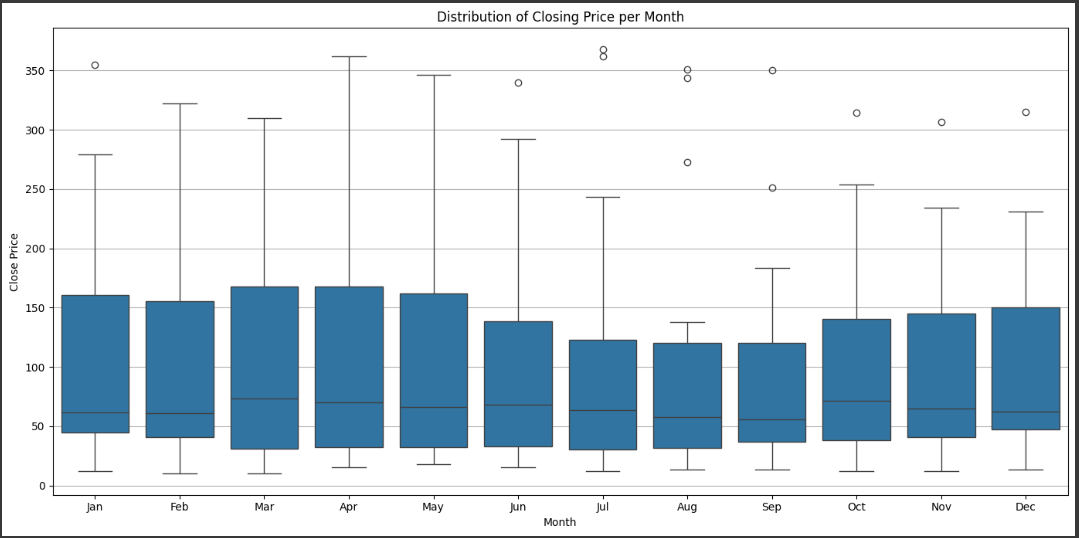

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# You can also create a box plot or violin plot to see the distribution of closing prices per month
# This would show the range and variability, not just the average

plt.figure(figsize=(14, 7))
sns.boxplot(x='Month_split', y='Close', data=df1)
plt.title('Distribution of Closing Price per Month')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Label with month names
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare the distribution (spread, median, outliers) of closing prices across different months.

##### 2. What is/are the insight(s) found from the chart?

Shows the trend of median closing price over time. Reveals monthly price volatility (box/whisker height) and highlights unusual high/low prices (outliers).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify months that historically show higher average closing prices or lower volatility, which can inform monthly trading strategies or financial planning. Negative: Can reveal months with consistently lower prices or higher volatility (wider boxes/whiskers, more outliers), suggesting weaker periods or increased risk for that month, useful for risk management and planning for potential dips.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# You can also create a box plot or violin plot to see the distribution of closing prices per month
# This would show the range and variability, not just the average

plt.figure(figsize=(14, 7))
sns.boxplot(x='Year_split', y='Close', data=df1)
plt.title('Distribution of Closing Price per Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.xticks(range(0, 16), ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']) # Label with month names
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare the distribution (spread, median, outliers) of closing prices across different years, revealing how prices vary year-to-year.

##### 2. What is/are the insight(s) found from the chart?

Shows the trend of median closing price over time (expected to rise then fall after 2018). Reveals yearly price volatility (box/whisker height) and highlights unusual high/low prices (outliers).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify strong performance periods for investment timing. Clearly shows the price drop and negative growth after 2018, likely due to the fraud case, highlighting risk and the impact of negative events on stock value.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
df1.hist(figsize=(10, 10), bins=10)
plt.suptitle("Histograms for All Columns", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df1.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

##### 1. Why did you pick the specific chart?

A correlational matrix plot was generated as it shows correlation between different variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The close price is highly co-related with Open, High and Low prices (close to 1).

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1)
plt.show()

##### 1. Why did you pick the specific chart?

The Pair Plot provides a visual matrix of scatter plots for all pairs of numerical variables and histograms for individual variables. It's chosen to quickly understand the distribution of each variable and the pairwise relationships (correlations) between features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

-Strong positive correlations among 'Open', 'High', 'Low', and 'Close' prices. <br>
-The overall trend of prices over time when plotted against 'Date_integer'/'Year_split', showing an increase followed by a sharp decrease. <br>
-The distribution shape of each numerical variable.<br>
-Possible seasonal patterns when prices are plotted against 'Month_split'.




## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The daily range of stock prices (High - Low) is significantly correlated with the closing price of the stock. A larger daily price range might indicate higher volatility, which could be related to larger movements in the closing price.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import pearsonr
import numpy as np # Import numpy for creating the price range

# Assuming df1 DataFrame is loaded and contains 'High', 'Low', and 'Close' columns

# Calculate the daily price range
df1['Price_Range'] = df1['High'] - df1['Low']

# Perform Pearson correlation test between Price_Range and Close
# pearsonr returns the Pearson correlation coefficient and the 2-tailed p-value
correlation_coefficient, p_value = pearsonr(df1['Price_Range'], df1['Close'])

print(f"Pearson Correlation Coefficient between Daily Price Range and Close Price: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Define significance level (commonly 0.05)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("Conclusion: There is a statistically significant correlation between the daily price range and the closing price.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant correlation between the daily price range and the closing price.")

##### Which statistical test have you done to obtain P-Value?

Test for Pearson's Correlation Coefficient.

##### Why did you choose the specific statistical test?

Since this test is used to calculate the degree of correlation between variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average closing price of the stock is significantly different in certain months compared to the overall yearly average. Specifically, we could test if there are statistically significant differences in average closing prices between different months.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import f_oneway

# Assuming df1 DataFrame is loaded and contains 'Close' and 'Month_split' columns

# Group the closing prices by month
# Create a list where each element is a list of closing prices for a specific month
monthly_close_prices = [df1['Close'][df1['Month_split'] == month] for month in sorted(df1['Month_split'].unique())]

# Perform One-Way ANOVA test
# f_oneway takes multiple arrays/series as arguments, one for each group
f_statistic, p_value = f_oneway(*monthly_close_prices)

print(f"One-Way ANOVA F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Define significance level (commonly 0.05)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the average closing price across different months.")
    print("Further post-hoc tests would be needed to determine which specific months differ.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the average closing price across different months.")

##### Which statistical test have you done to obtain P-Value?

One-way Analysis of Variance (ANOVA).

##### Why did you choose the specific statistical test?

Because this test checks for statistical significance between the means (averages) of 3 or more independent variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant increasing or decreasing trend in the average annual closing price of the stock over the period covered by the dataset. We could test if the slope of a linear regression line fitted to the average annual closing prices is statistically different from zero.

#### 2. Perform an appropriate statistical test.


In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 DataFrame is loaded and contains 'Close' and 'Year_split' columns

# Calculate the average closing price per year
yearly_close_avg = df1.groupby('Year_split')['Close'].mean().reset_index()

# Ensure the data is sorted by year
yearly_close_avg_sorted = yearly_close_avg.sort_values(by='Year_split')

# Perform Linear Regression
# We regress the average annual closing price (dependent variable) on the Year (independent variable)
slope, intercept, r_value, p_value, std_err = linregress(yearly_close_avg_sorted['Year_split'], yearly_close_avg_sorted['Close'])

print(f"Slope of the linear trend: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"P-value for the slope: {p_value:.4f}")
print(f"Standard Error of the slope: {std_err:.4f}")

# Define significance level (commonly 0.05)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("Conclusion: There is a statistically significant linear trend in the average annual closing price over the years.")
    if slope > 0:
        print("The trend is increasing.")
    else:
        print("The trend is decreasing.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant linear trend in the average annual closing price over the years.")

# Optional: Plot the data and the regression line to visualize the trend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year_split', y='Close', data=yearly_close_avg_sorted, label='Average Annual Close Price')
plt.plot(yearly_close_avg_sorted['Year_split'], intercept + slope * yearly_close_avg_sorted['Year_split'], color='red', label=f'Linear Trend (Slope: {slope:.2f})')
plt.title('Linear Trend of Average Annual Closing Price')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.xticks(yearly_close_avg_sorted['Year_split'], rotation=45) # Set x-ticks to actual years
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### Which statistical test have you done to obtain P-Value?

Linear regression.

##### Why did you choose the specific statistical test?

As this test shows whether or not there is an increasing trend in average closing annual price.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print("Missing values count per column:")
print(df1.isnull().sum())

#### What all missing value imputation techniques have you used and why did you use those techniques?

Usually mean, median, mode imputations are used, or the missing value records are simply dropped. No missing values are present in this dataset, so no need of imputation.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
import pandas as pd
import numpy as np

# List of numerical columns to check for outliers
# Assuming 'Open', 'High', 'Low', 'Close', 'Price_Range' are numerical
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Price_Range'] # Add other numerical columns if any

# Dictionary to store outliers for each column
outliers_dict = {}

# Iterate through each numerical column
for col in numerical_cols:
    print(f"\nChecking outliers for column: {col}")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    # Values below lower_bound or above upper_bound are considered outliers
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    # Store the outliers
    outliers_dict[col] = outliers

    # Print information about the outliers
    print(f"  Q1: {Q1:.4f}")
    print(f"  Q3: {Q3:.4f}")
    print(f"  IQR: {IQR:.4f}")
    print(f"  Lower Bound: {lower_bound:.4f}")
    print(f"  Upper Bound: {upper_bound:.4f}")
    print(f"  Number of outliers detected: {len(outliers)}")

    # Display the outlier rows (optional)
    # print("  Outlier rows:")
    # print(outliers)


# You can access the identified outliers for a specific column like this:
# print("\nOutliers in 'Close' column:")
# print(outliers_dict['Close'])

# You could also visualize outliers using box plots (as you did in your EDA)
import matplotlib.pyplot as plt
import seaborn as sns

print("\nVisualizing outliers with Box Plots:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df1[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Outlier Treatment: Winsorizing (Capping)

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize # Import winsorize

# List of numerical columns to apply outlier treatment
numerical_cols_to_treat = ['Open', 'High', 'Low', 'Close', 'Price_Range'] # Select columns you want to treat

# Define the limits for winsorizing (e.g., 5% from the lower and upper tails)
# limits=(lower_tail_proportion, upper_tail_proportion)
winsor_limits = (0.05, 0.05) # This will cap values below 5th percentile and above 95th percentile

# Create a copy of the DataFrame to apply treatments, so the original df1 is preserved
df1_treated_winsor = df1.copy()

print("Applying Winsorizing treatment...")

# Apply winsorize to the selected numerical columns
for col in numerical_cols_to_treat:
    if col in df1_treated_winsor.columns: # Check if column exists
        try:
            # Winsorize the column
            df1_treated_winsor[col] = winsorize(df1_treated_winsor[col], limits=winsor_limits)
            print(f"  Winsorized column: {col}")
        except Exception as e:
            print(f"  Could not winsorize column {col}: {e}")
    else:
        print(f"  Column {col} not found in DataFrame.")


print("\nFirst 5 rows of DataFrame after Winsorizing:")
print(df1_treated_winsor.head())
print("\nLast 5 rows of DataFrame after Winsorizing:")
print(df1_treated_winsor.tail())

# You can also visualize the data after winsorizing using box plots to see the effect
import matplotlib.pyplot as plt
import seaborn as sns

print("\nVisualizing columns after Winsorizing with Box Plots:")
for col in numerical_cols_to_treat:
     if col in df1_treated_winsor.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df1_treated_winsor[col])
        plt.title(f'Box Plot of {col} (Winsorized)')
        plt.xlabel(col)
        plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) method was used for identifying outliers. Winsorizing was used as outlier treatment to reduce the influence of extreme values without losing data points entirely. This approach caps the most extreme values at a certain percentile (5% here), preserving the overall structure of the dataset.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# display data type of all columns
print(df1.dtypes)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since all values are of numerical type and no categorical column exists, this step is not required.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Example: Create a lagged Close price feature
df1['Close_Lag1'] = df1['Close'].shift(1)

# You might want to fill the resulting NaN in the first row
# For example, fill with the first available value or 0
df1['Close_Lag1'].fillna(method='bfill', inplace=True) # Backward fill

# Similarly for other features
df1['Open_Lag1'] = df1['Open'].shift(1)
df1['Open_Lag1'].fillna(method='bfill', inplace=True)

# You can create lags of different periods (e.g., 5-day lag, 30-day lag)
# df1['Close_Lag5'] = df1['Close'].shift(5)
# df1['Close_Lag5'].fillna(method='bfill', inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Select your features wisely to avoid overfitting

# Assuming df1 is your DataFrame and it contains 'Open', 'High', 'Low', and 'Close'

# Define the features (X) - Open, High, Low
features = ['Open', 'High', 'Low']
X = df1[features]

# Define the target variable (y) - Close
target = 'Close'
y = df1[target]

# You can verify the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Display the first few rows of X and y to confirm
print("\nFirst 5 rows of X (features):")
print(X.head())

print("\nFirst 5 rows of y (target):")
print(y.head())

# Note: This code creates X and y as new DataFrames/Series.
# It does NOT modify the original df1 by dropping columns.
# If you specifically need to drop columns from df1 itself after this step,
# you would do that separately, but it's usually better to create X and y
# by selecting the desired columns as shown above, leaving df1 intact
# for potential future analysis or feature engineering.

##### What all feature selection methods have you used  and why?

Based on degree of correlation.

##### Which all features you found important and why?

Open, High and Low prices had correlation with Closing price. So, these are used for close price prediction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc = ['Open', 'High', 'Low', 'Close']
df1[sc] = scaler.fit_transform(df1[sc])
print(df1.head())

##### Which method have you used to scale you data and why?

Standard Scaler function is used for Normalisation or  Min-Max scaling. This function scales data to a fixed range, usually between 0 and 1.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### What data splitting ratio have you used and why?

80-20 splitting ratio is used, i.e., 80% for training and 20% for testing as it is widely employed.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Fit the Algorithm
# Create a Linear Regression model instance
linear_reg_model = LinearRegression()

# Train the model using the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the model
# Make predictions on the testing data
y_pred = linear_reg_model.predict(X_test)

# Print evaluation metrics of the model
print("## Evaluation Metrics for Linear Regression Model")

# Calculate Mean Squared Error (MSE)
# MSE measures the average squared difference between the actual and predicted values. Lower values indicate better performance.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
# RMSE is the square root of MSE and is on the same scale as the target variable. It is often easier to interpret than MSE.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared (Coefficient of Determination)
# R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
# A value of 1.0 indicates a perfect fit. [2]
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2:.4f}")

# Optional: Display the first few predictions and actual values
print("\nSample Predictions vs Actuals:")
# Create a DataFrame for easier comparison
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualise the score chart

# Create a DataFrame for the evaluation metrics
metrics_data = {'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2 Score)'],
                'Score': [mse, rmse, r2]}
metrics_df = pd.DataFrame(metrics_data)

print("\nEvaluation Metrics DataFrame:")
print(metrics_df)

# Visualizing the metrics
plt.figure(figsize=(10, 6))

# For MSE and RMSE, a bar chart is suitable to show the value
# For R-squared, a bar chart is also suitable to show the proportion
sns.barplot(x='Metric', y='Score', data=metrics_df)

# Add titles and labels
plt.title('Linear Regression Model Evaluation Metrics')
plt.ylabel('Score Value')
plt.xlabel('Evaluation Metric')

# Add the score values on top of the bars for clarity
for index, row in metrics_df.iterrows():
    plt.text(row.name, row.Score, f'{row.Score:.4f}', color='black', ha="center")

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

# You can also visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Closing Prices (Linear Regression)")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

## Hyperparameter Tuning - Random Search

# Import necessary libraries for Random Search and the model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Define a parameter distribution for Random Search
# For LinearRegression, consider `fit_intercept` as a parameter to tune.
param_distributions = {
    'fit_intercept': [True, False], # Whether to calculate the intercept for this model.
}

# Create a Linear Regression model instance
linear_reg = LinearRegression()

# Create a RandomizedSearchCV object
# n_iter: Number of parameter settings that are sampled. Adjust based on computational resources.
# cv: Number of cross-validation folds.
# scoring: Metric to evaluate the models (e.g., 'neg_mean_squared_error' is common for regression, we negate it because GridSearchCV maximizes the score).
# random_state: Seed for reproducibility.
# n_jobs: Number of CPU cores to use. -1 uses all available cores.
random_search = RandomizedSearchCV(estimator=linear_reg,
                                   param_distributions=param_distributions,
                                   n_iter=10, # Number of parameter settings sampled; adjust as needed
                                   cv=5, # 5-fold cross-validation
                                   scoring='neg_mean_squared_error', # Use negative MSE for scoring
                                   random_state=42,
                                   n_jobs=-1)

# Perform the random search on the training data
print("Starting Random Search for Hyperparameter Tuning...")
random_search.fit(X_train, y_train)
print("Random Search finished.")

# Get the best parameters found by Random Search
best_params = random_search.best_params_
print("\nBest Hyperparameters found by Random Search:", best_params)

# Get the best model trained during Random Search
best_linear_reg_model = random_search.best_estimator_

# Evaluate the best model on the testing data
y_pred_tuned = best_linear_reg_model.predict(X_test)

# Print evaluation metrics of the tuned model
print("\n## Evaluation Metrics for Tuned Linear Regression Model (via Random Search)")

# Calculate Mean Squared Error (MSE) for the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Mean Squared Error (MSE): {mse_tuned:.4f}")

# Calculate Root Mean Squared Error (RMSE) for the tuned model
rmse_tuned = np.sqrt(mse_tuned)
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.4f}")

# Calculate R-squared (Coefficient of Determination) for the tuned model
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"R-squared (R2 Score): {r2_tuned:.4f}")

##### Which hyperparameter optimization technique have you used and why?

Random Search was used as it is capable of exploring large spaces with fewer computational resources.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics show no change.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

## ***7. ML Model Implementation***

### ML Model - 2 - Decision Tree Regression

# ML Model - 2 Implementation

# Import Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Fit the Algorithm
# Create a Decision Tree Regressor model instance
# You can start with default parameters or specify some like max_depth
decision_tree_model = DecisionTreeRegressor(random_state=42) # Setting random_state for reproducibility

# Train the model using the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the model
# Make predictions on the testing data
y_pred_dt = decision_tree_model.predict(X_test)

# Print evaluation metrics of the model
print("## Evaluation Metrics for Decision Tree Regression Model")

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")

# Calculate R-squared (Coefficient of Determination)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R-squared (R2 Score): {r2_dt:.4f}")

# Optional: Display the first few predictions and actual values
print("\nSample Predictions vs Actuals (Decision Tree):")
# Create a DataFrame for easier comparison
predictions_dt_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print(predictions_dt_df.head())

# Visualise the score chart for Decision Tree Regression

# Create a DataFrame for the evaluation metrics for Decision Tree
metrics_data_dt = {'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2 Score)'],
                   'Score': [mse_dt, rmse_dt, r2_dt]}
metrics_dt_df = pd.DataFrame(metrics_data_dt)

print("\nDecision Tree Evaluation Metrics DataFrame:")
print(metrics_dt_df)

# Visualizing the metrics for Decision Tree
plt.figure(figsize=(10, 6))

sns.barplot(x='Metric', y='Score', data=metrics_dt_df)

# Add titles and labels
plt.title('Decision Tree Regression Model Evaluation Metrics')
plt.ylabel('Score Value')
plt.xlabel('Evaluation Metric')

# Add the score values on top of the bars for clarity
for index, row in metrics_dt_df.iterrows():
    plt.text(row.name, row.Score, f'{row.Score:.4f}', color='black', ha="center")

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

# You can also visualize the actual vs predicted values for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual vs Predicted Closing Prices (Decision Tree Regression)")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

## Hyperparameter Tuning for Decision Tree Regression - Random Search

# Import necessary libraries for Random Search and Decision Tree Regressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Define a parameter distribution for Random Search for Decision Tree
param_distributions_dt = {
    'max_depth': [None] + list(np.arange(5, 31, 5)), # Maximum depth of the tree. None means unlimited.
    'min_samples_split': np.arange(2, 21, 2),      # Minimum number of samples required to split an internal node.
    'min_samples_leaf': np.arange(1, 21, 2),        # Minimum number of samples required to be at a leaf node.
    'max_features': ['auto', 'sqrt', 'log2', None], # Number of features to consider when looking for the best split. 'auto' is deprecated, consider 'sqrt' or 'log2'.
    'splitter': ['best', 'random']                  # Strategy used to choose the split at each node.
}

# Create a Decision Tree Regressor model instance
decision_tree = DecisionTreeRegressor(random_state=42) # Set random_state for reproducibility

# Create a RandomizedSearchCV object
# n_iter: Number of parameter settings that are sampled. Adjust based on computational resources.
# cv: Number of cross-validation folds.
# scoring: Metric to evaluate the models. 'neg_mean_squared_error' is common for regression.
# random_state: Seed for reproducibility.
# n_jobs: Number of CPU cores to use. -1 uses all available cores.
random_search_dt = RandomizedSearchCV(estimator=decision_tree,
                                      param_distributions=param_distributions_dt,
                                      n_iter=50, # Increase n_iter for a more thorough search (e.g., 50 or 100)
                                      cv=5, # 5-fold cross-validation
                                      scoring='neg_mean_squared_error', # Use negative MSE for scoring
                                      random_state=42,
                                      n_jobs=-1,
                                      verbose=1) # Add verbose to see the progress

# Perform the random search on the training data
print("Starting Random Search for Hyperparameter Tuning for Decision Tree...")
random_search_dt.fit(X_train, y_train)
print("Random Search finished.")

# Get the best parameters found by Random Search
best_params_dt = random_search_dt.best_params_
print("\nBest Hyperparameters found by Random Search (Decision Tree):", best_params_dt)

# Get the best model trained during Random Search
best_decision_tree_model = random_search_dt.best_estimator_

# Evaluate the best model on the testing data
y_pred_tuned_dt = best_decision_tree_model.predict(X_test)

# Print evaluation metrics of the tuned Decision Tree model
print("\n## Evaluation Metrics for Tuned Decision Tree Model (via Random Search)")

# Calculate Mean Squared Error (MSE) for the tuned model
mse_tuned_dt = mean_squared_error(y_test, y_pred_tuned_dt)
print(f"Mean Squared Error (MSE): {mse_tuned_dt:.4f}")

# Calculate Root Mean Squared Error (RMSE) for the tuned model
rmse_tuned_dt = np.sqrt(mse_tuned_dt)
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_dt:.4f}")

# Calculate R-squared (Coefficient of Determination) for the tuned model
r2_tuned_dt = r2_score(y_test, y_pred_tuned_dt)
print(f"R-squared (R2 Score): {r2_tuned_dt:.4f}")

##### Which hyperparameter optimization technique have you used and why?

Random Search was used as it is capable of exploring large spaces with fewer computational resources.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics show no change.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

### ML Model - 3 - K-Nearest Neighbors Regression

# ML Model - 3 Implementation

# Import K-Nearest Neighbors Regressor model
from sklearn.neighbors import KNeighborsRegressor

# Import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Fit the Algorithm
# Create a K-Nearest Neighbors Regressor model instance
# We'll start with a default or common value for n_neighbors, like 5.
# The 'weights' parameter can be 'uniform' or 'distance'.
# The 'algorithm' parameter can be 'auto', 'ball_tree', 'kd_tree', 'brute'.
knn_reg_model = KNeighborsRegressor(n_neighbors=5) # Starting with 5 neighbors [1]

# Train the model using the training data
print("Training K-Nearest Neighbors Regression model...")
knn_reg_model.fit(X_train, y_train)
print("Training finished.")

# Predict on the model
# Make predictions on the testing data
print("Making predictions on the test set...")
y_pred_knn = knn_reg_model.predict(X_test)
print("Predictions finished.")


# Print evaluation metrics of the model
print("\n## Evaluation Metrics for K-Nearest Neighbors Regression Model")

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")

# Calculate R-squared (Coefficient of Determination)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R-squared (R2 Score): {r2_knn:.4f}")

# Optional: Display the first few predictions and actual values
print("\nSample Predictions vs Actuals (K-Nearest Neighbors):")
# Create a DataFrame for easier comparison
predictions_knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
print(predictions_knn_df.head())

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualise the score chart for K-Nearest Neighbors Regression

# Create a DataFrame for the evaluation metrics for K-Nearest Neighbors
metrics_data_knn = {'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2 Score)'],
                    'Score': [mse_knn, rmse_knn, r2_knn]}
metrics_knn_df = pd.DataFrame(metrics_data_knn)

print("\nK-Nearest Neighbors Evaluation Metrics DataFrame:")
print(metrics_knn_df)

# Visualizing the metrics for K-Nearest Neighbors
plt.figure(figsize=(10, 6))

sns.barplot(x='Metric', y='Score', data=metrics_knn_df)

# Add titles and labels
plt.title('K-Nearest Neighbors Regression Model Evaluation Metrics')
plt.ylabel('Score Value')
plt.xlabel('Evaluation Metric')

# Add the score values on top of the bars for clarity
for index, row in metrics_knn_df.iterrows():
    plt.text(row.name, row.Score, f'{row.Score:.4f}', color='black', ha="center")

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

# You can also visualize the actual vs predicted values for K-Nearest Neighbors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (K-Nearest Neighbors)")
plt.title("Actual vs Predicted Closing Prices (K-Nearest Neighbors Regression)")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

## Hyperparameter Tuning for K-Nearest Neighbors Regression - Random Search

# Import necessary libraries for Random Search and KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define a parameter distribution for Random Search for K-Nearest Neighbors
param_distributions_knn = {
    'n_neighbors': np.arange(1, 31), # Number of neighbors to use. Try a range of values.
    'weights': ['uniform', 'distance'], # Weight function used in prediction.
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # Algorithm used to compute the nearest neighbors.
    'p': [1, 2] # Power parameter for the Minkowski metric. p=1 is Manhattan distance, p=2 is Euclidean distance.
}

# Create a K-Nearest Neighbors Regressor model instance
knn_reg = KNeighborsRegressor()

# Create a RandomizedSearchCV object
# n_iter: Number of parameter settings that are sampled. Increase for a more thorough search.
# cv: Number of cross-validation folds.
# scoring: Metric to evaluate the models. 'neg_mean_squared_error' is common for regression.
# random_state: Seed for reproducibility.
# n_jobs: Number of CPU cores to use. -1 uses all available cores.
random_search_knn = RandomizedSearchCV(estimator=knn_reg,
                                       param_distributions=param_distributions_knn,
                                       n_iter=50, # Number of parameter settings sampled; adjust as needed
                                       cv=5, # 5-fold cross-validation
                                       scoring='neg_mean_squared_error', # Use negative MSE for scoring [2]
                                       random_state=42,
                                       n_jobs=-1,
                                       verbose=1) # Add verbose to see the progress

# Perform the random search on the training data
print("Starting Random Search for Hyperparameter Tuning for K-Nearest Neighbors...")
random_search_knn.fit(X_train, y_train)
print("Random Search finished.")

# Get the best parameters found by Random Search
best_params_knn = random_search_knn.best_params_
print("\nBest Hyperparameters found by Random Search (K-Nearest Neighbors):", best_params_knn)

# Get the best model trained during Random Search
best_knn_reg_model = random_search_knn.best_estimator_

# Evaluate the best model on the testing data
y_pred_tuned_knn = best_knn_reg_model.predict(X_test)

# Print evaluation metrics of the tuned K-Nearest Neighbors model
print("\n## Evaluation Metrics for Tuned K-Nearest Neighbors Model (via Random Search)")

# Calculate Mean Squared Error (MSE) for the tuned model
mse_tuned_knn = mean_squared_error(y_test, y_pred_tuned_knn)
print(f"Mean Squared Error (MSE): {mse_tuned_knn:.4f}")

# Calculate Root Mean Squared Error (RMSE) for the tuned model
rmse_tuned_knn = np.sqrt(mse_tuned_knn)
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_knn:.4f}")

# Calculate R-squared (Coefficient of Determination) for the tuned model
r2_tuned_knn = r2_score(y_test, y_pred_tuned_knn)
print(f"R-squared (R2 Score): {r2_tuned_knn:.4f}")

##### Which hyperparameter optimization technique have you used and why?

Random Search was used as it is capable of exploring large spaces with fewer computational resources.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics show no change.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R squared metrics.<br>
**Mean Squared Error (MSE):** MSE calculates the average of the squared differences between predicted and actual values. It provides a measure of the overall error in the model's predictions, with lower MSE indicating better performance. MSE is particularly useful when large errors are undesirable, as it penalizes them more heavily due to the squaring of the differences.<br>
**Root Mean Squared Error (RMSE):** The average magnitude of the errors between predicted and actual values in a dataset. It measures how spread out the residuals (prediction errors) are from the regression line or the best fit line. A lower RMSE value signifies a better fit of the model to the data, with smaller differences between predicted and actual values. <br>
**R-squared:** This metric represents the proportion of variance in the dependent variable that is explained by the independent variables in the model. A higher R-squared value (closer to 1) suggests a better fit, indicating that the model explains a larger portion of the variability in the target variable. In a business context, a higher R-squared for a revenue prediction model, for example, implies the model can accurately forecast revenue based on the factors it considers.  

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

the Tuned Linear Regression Model performs the best. It has the lowest Mean Squared Error and Root Mean Squared Error, and the highest R-squared score, indicating that it fits the testing data most accurately among the three tuned models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Save all 3 tuned models using the pickle library

import pickle
import os

# Define a directory to save the models (optional, but good practice)
model_save_dir = 'saved_models'
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

# --- Save Tuned Linear Regression Model ---
# Ensure best_linear_reg_model exists from previous tuning steps
if 'best_linear_reg_model' in locals():
    linear_reg_filename = os.path.join(model_save_dir, 'tuned_linear_regression_model.pkl')
    try:
        with open(linear_reg_filename, 'wb') as file:
            pickle.dump(best_linear_reg_model, file)
        print(f"Tuned Linear Regression model saved successfully to {linear_reg_filename}")
    except Exception as e:
        print(f"Error saving Tuned Linear Regression model: {e}")
else:
    print("Tuned Linear Regression model not found. Please run the tuning code first.")


# --- Save Tuned Decision Tree Model ---
# Ensure best_decision_tree_model exists from previous tuning steps
if 'best_decision_tree_model' in locals():
    decision_tree_filename = os.path.join(model_save_dir, 'tuned_decision_tree_model.pkl')
    try:
        with open(decision_tree_filename, 'wb') as file:
            pickle.dump(best_decision_tree_model, file)
        print(f"Tuned Decision Tree model saved successfully to {decision_tree_filename}")
    except Exception as e:
        print(f"Error saving Tuned Decision Tree model: {e}")
else:
     print("Tuned Decision Tree model not found. Please run the tuning code first.")


# --- Save Tuned K-Nearest Neighbors Model ---
# Ensure best_knn_reg_model exists from previous tuning steps
if 'best_knn_reg_model' in locals():
    knn_filename = os.path.join(model_save_dir, 'tuned_knn_regression_model.pkl')
    try:
        with open(knn_filename, 'wb') as file:
            pickle.dump(best_knn_reg_model, file)
        print(f"Tuned K-Nearest Neighbors model saved successfully to {knn_filename}")
    except Exception as e:
        print(f"Error saving Tuned K-Nearest Neighbors model: {e}")
else:
    print("Tuned K-Nearest Neighbors model not found. Please run the tuning code first.")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
## ***8. Loading and Testing a Saved Model***

### Variable Description using describe()

# Dataset Describe
print("## Description of Dataset Variables:")
print(df1.describe())

### Loading a Saved Model and Testing on Unseen Data

# Import necessary libraries
import pickle
import os
import pandas as pd
import numpy as np

# Define the directory where models were saved
model_save_dir = 'saved_models'

# --- Choose which model to load and test ---
# Let's choose to load the best performing one based on your metrics, the Tuned Linear Regression model.
model_filename = os.path.join(model_save_dir, 'tuned_linear_regression_model.pkl')

# Check if the model file exists
if not os.path.exists(model_filename):
    print(f"Error: Model file not found at {model_filename}. Please ensure the saving code ran correctly.")
else:
    # --- Load the model ---
    print(f"\nLoading model from {model_filename}...")
    try:
        with open(model_filename, 'rb') as file:
            loaded_model = pickle.load(file)
        print("Model loaded successfully.")

        # --- Create some unseen random data ---
        # We need to create data with the same features (columns) that the model was trained on.
        # Based on your feature selection, the features were 'Open', 'High', and 'Low'.
        # Let's create a small DataFrame with random values within a plausible range based on your dataset's describe output.
        # NOTE: Replace these plausible ranges with values that make sense for potential future scenarios.
        # For demonstration, let's use ranges derived loosely from your data's min/max or mean +/- std dev.

        # Get descriptive statistics to inform plausible ranges
        desc_stats = df1[['Open', 'High', 'Low']].describe()

        # Create random data points
        num_random_samples = 5 # How many random data points you want to test

        random_data = {}
        for col in ['Open', 'High', 'Low']:
            # Generate random numbers between the min and max of the training data for that feature
            # Or use mean +/- a few std deviations
            mean_val = desc_stats.loc['mean', col]
            std_val = desc_stats.loc['std', col]
            # Let's generate data around the mean, but you could use min/max as well.
            # Ensure values are non-negative for prices.
            random_data[col] = np.random.uniform(max(0, mean_val - 1.5 * std_val), mean_val + 1.5 * std_val, num_random_samples)


        unseen_data = pd.DataFrame(random_data)

        print("\nUnseen Random Data for Testing:")
        print(unseen_data)

        # --- Make predictions on the unseen data ---
        print("\nMaking predictions on the unseen data...")
        try:
            predicted_prices = loaded_model.predict(unseen_data)

            print("\nPredicted Closing Prices for Unseen Data:")
            # Display predictions along with the input data for clarity
            unseen_data['Predicted_Close'] = predicted_prices
            print(unseen_data)

        except Exception as e:
             print(f"Error making predictions: {e}")


    except Exception as e:
        print(f"Error loading the model: {e}")

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

3 machine learning models using supervised learning were deployed for Yes Bank Stock Price Prediciton- Linear Regression model, Decision Tree model and K-Nearest Neighbour (KNN) model. The data was explored, cleaned and wrangled, making it suitable for the learning process. It was then split into 80-20 ratio, where 80% was used for training and 20% for testing. The predicted values of the model were then compared with the actual values in training set, and based on this, the evaluation metrics were calculated to determine the models' performance. Out of the 3 models, the Linear Regression model had the lowest MSE and RMSE values and the highest R squared values, due to which it was deemed most suitable for the task. The models were then saved using the pickle library for future use.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***